<div class="alert alert-success">
<h2>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: Armanda Sanjaya</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011281722075</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK5A</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : Kecerdasan Buatan</strong></h3>
</li>
</ul>
</div>

<div class="">
<br><br>
<center><br><font size="10"><font face="timesnewroman"><strong>Jaringan Syaraf Tiruan
<center><br><font size="5"><font face="timesnewroman"><strong>Forest type mapping Data Set
<br><br>

Kumpulan data ini berisi data pelatihan dan pengujian dari studi penginderaan jauh yang memetakan berbagai tipe hutan berdasarkan karakteristik spektralnya pada panjang gelombang inframerah yang terlihat dekat, menggunakan citra satelit ASTER. Output (peta tipe hutan) dapat digunakan untuk mengidentifikasi dan / atau mengukur jasa ekosistem (mis. Penyimpanan karbon, perlindungan erosi) yang disediakan oleh hutan.

**download dataset disini** : https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping

Sebelum kita membuat program neural network kita harus memasukan library dengan instruksi "import",
dan disini saya menggunakan library yang dibutuhkan untuk membuat program neural network.

**Pandas**
adalah  sebuah librari berlisensi BSD dan open source yang menyediakan struktur data dan analisis data yang mudah digunakan dan berkinerja tinggi untuk bahasa pemrograman Python.

**NumPy**
numpy a.k.a numerical python  adalah sebuah array yang dapat menampung banyak dimnesi.

**Keras.utils import to_categorical** 
untuk mengubah data categorical menjadi numerik dan di jadikan nilai biner (0 dan 1)

**from sklearn.preprocessing import LabelEncoder**
Mengubah Categori menjadi Numerik

**from sklearn.model_selection import train_test_split**
untuk membagi datset sesuai dengan yang kita inginkan

**matplotlib.pyplot**
yaitu berfungsi sebagai membuat grafik  dari dataframe atau numpy dengan berbagai macam jenis-jenis grafiknya

**from keras.layers import Dense**
dense mengimplementasikan operasi: output = aktivasi (dot (input, kernel) + bias) di mana aktivasi adalah fungsi aktivasi elemen-bijaksana dilewatkan sebagai argumen aktivasi, kernel adalah matriks bobot yang dibuat oleh lapisan, dan bias adalah vektor bias yang dibuat oleh lapisan (hanya berlaku jika use_bias Benar).Catatan: jika input ke layer memiliki peringkat lebih besar dari 2, maka ia diratakan sebelum produk titik awal dengan kernel.

**from keras.models import sequential**
Model Sequential adalah tumpukan linear lapisan.Anda bisa membuat model Sequential dengan mengirimkan daftar instance layer ke konstruktor

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # ngubah categori ke angka
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


# **Mengganti Direktori ke tempat dataset tersimpan**

In [2]:
cd E:\ForestTypes

E:\ForestTypes


# Import Datset

In [3]:
datatrain = pd.read_csv('training.csv')

datatest = pd.read_csv('testing.csv')

datset ini sebelumnya sudah di bagi menjadi 2 , data training dan juga data testing

 **.head()**
 
 datatrain.head() = menampilkan 5 baris pertama pada datatrain

In [4]:
datatrain.head()


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


 **.head()**
 
 datatest.head() = menampilkan 5 baris pertama pada datatest

In [5]:
datatest.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


**pd.concat([,])** adalah fungsi untuk menggabungakn dua dataframe tanpa mengubah urutan dan isi data tersebut. 

Dataset ini sebenarnya sudah di split menjadi training dan testing akan tetapi disini saya akan menggabungkannya dan nantinya akan  split lagi menggunakan "from sklearn.model_selection import train_test_split" , dan dapat di split sesuai dengan yang kita inginkan

In [6]:
dataset = pd.concat([datatrain, datatest])
dataset

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
5,h,85,28,56,120,52,98,101,27,65,...,-10.28,-26.18,-1.89,-5.89,-34.92,-1.89,-8.05,-29.72,-1.94,-4.94
6,s,56,29,50,93,51,94,77,26,58,...,-2.68,-26.33,-0.55,-3.89,-23.84,0.02,-4.20,-23.17,-0.22,-4.22
7,d,40,39,58,82,61,99,89,26,57,...,-0.19,-18.72,-2.61,-8.38,-20.56,-1.51,-6.68,-21.16,-3.42,-6.61
8,s,53,27,49,95,49,92,63,25,54,...,0.92,-25.65,-2.09,-5.95,-39.27,-2.13,-8.73,-30.73,-2.42,-5.58
9,o,51,57,77,90,89,123,97,47,83,...,-26.44,-20.97,-1.76,-5.05,-22.01,-0.93,-5.60,-22.26,-3.28,-6.39


**dataset.shape** 

yaitu untuk melihat bentuk(dimensi) dari sebuah dataframe dalam hal ini bernama 'dataset' 

In [7]:
dataset.shape

(523, 28)

**datset.isnull().sum**

adalah untuk melihat dan menjumlahkan data yang bernilai "null" pada tiap tiap atribut

In [8]:
dataset.isnull().sum()

class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
pred_minus_obs_H_b9    0
pred_minus_obs_S_b1    0
pred_minus_obs_S_b2    0
pred_minus_obs_S_b3    0
pred_minus_obs_S_b4    0
pred_minus_obs_S_b5    0
pred_minus_obs_S_b6    0
pred_minus_obs_S_b7    0
pred_minus_obs_S_b8    0
pred_minus_obs_S_b9    0
dtype: int64

**Memisahkan data fitur menggunakan intruksi 'iloc' , variabelnya x**

mengambil semua isi dari kolom 2-28 dari datset dan disimpan pada variabel x

In [9]:
# ILOC[baris,kolom]
x = dataset.iloc[:,1:28]


**Memisahkan data label menggunakan intruksi 'iloc'**

y_raw = data masih berupa kalimat dan akan di ubah menjadi numerik menggunakan labelEncoder dan OneHotEncoding

In [10]:
#Memisahkan data label 
y_raw = dataset.iloc[:,0]
y_raw.head()

0    d 
1    h 
2    s 
3    s 
4    d 
Name: class, dtype: object

**LABEL ENCODER** = FUNGSI nya  MENGUBAH data kategori(berupa huruf atau kalimat) ke numerik.

**ONE HOT ENCODING** =  adalah representasi variabel kategorikal sebagai vektor biner.Ini pertama-tama mensyaratkan bahwa nilai-nilai kategorikal dipetakan ke nilai integer.Kemudian, setiap nilai integer direpresentasikan sebagai vektor biner yang semuanya bernilai nol kecuali indeks integer, yang ditandai dengan 1.

In [11]:

labelenc = LabelEncoder()
y_enc = labelenc.fit_transform(y_raw)

#oNE HOT ENCODING
y = to_categorical(y_enc)

split data yang akan di train dan di test , **test_size = 0.2** adalah 20% untuk data test dan **train_test = 0.75** adalah 75% untuk data train , sisanya untuk validasi

In [12]:
# split data train test.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,test_size=0.2,random_state=2)

**np.unique** mennghitung nilai yang unik pada variabel y_train dan y_test

In [13]:
#menghitung jumlah nilai yang unik
np.unique(y_train,return_counts=True)
np.unique(y_test,return_counts=True)

(array([0., 1.], dtype=float32), array([315, 105], dtype=int64))

# Membuat Model

Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, x), dan Softmax yang merupakan fungsi aktivasi berkelanjutan .

In [14]:
#Membuat Model menyesuaikan input dan output
model = Sequential()
model.add(Dense(units =108 ,input_dim = 27,activation="relu"))
model.add(Dense(units =108 ,activation="relu"))
model.add(Dense(units =4 ,activation="softmax"))

**summary()** 

berfungsi untuk menampilkan ringkasan parameter berdasarkan layer dan output shape.

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 108)               3024      
_________________________________________________________________
dense_2 (Dense)              (None, 108)               11772     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 436       
Total params: 15,232
Trainable params: 15,232
Non-trainable params: 0
_________________________________________________________________


**compile()** 

berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST).  menggunakan optimizer adam dan categorical loss yaitu categorical crossentropy.

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

**epochs**: Pelatihan disusun menjadi zaman. Sebuah zaman adalah satu iterasi atas seluruh data input (ini dilakukan dalam batch yang lebih kecil).

**batch_size**: Ketika melewati data NumPy, model mengiris data menjadi batch yang lebih kecil dan mengulangi batch tersebut selama pelatihan. Bilangan bulat ini menentukan ukuran setiap bets. Ketahuilah bahwa batch terakhir mungkin lebih kecil jika jumlah total sampel tidak dapat dibagi dengan ukuran batch.

**validation_data**: Saat membuat prototipe model, Anda ingin dengan mudah memantau kinerjanya pada beberapa data validasi. Melewati argumen ini — sejumlah input dan label — memungkinkan model untuk menampilkan kerugian dan metrik dalam mode inferensi untuk data yang diteruskan, di akhir setiap zaman.

In [17]:
hasil_train = model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=40,epochs=100)

Train on 392 samples, validate on 105 samples
Epoch 1/100
392/392 [==============================] - 0s 501us/step - loss: 12.9444 - accuracy: 0.2653 - val_loss: 3.4025 - val_accuracy: 0.3333
Epoch 2/100
392/392 [==============================] - 0s 51us/step - loss: 1.9867 - accuracy: 0.5281 - val_loss: 0.8178 - val_accuracy: 0.8286
Epoch 3/100
392/392 [==============================] - 0s 43us/step - loss: 0.7281 - accuracy: 0.7985 - val_loss: 0.5491 - val_accuracy: 0.8381
Epoch 4/100
392/392 [==============================] - 0s 46us/step - loss: 0.5159 - accuracy: 0.8469 - val_loss: 0.4809 - val_accuracy: 0.8857
Epoch 5/100
392/392 [==============================] - 0s 53us/step - loss: 0.3901 - accuracy: 0.8776 - val_loss: 0.3738 - val_accuracy: 0.8857
Epoch 6/100
392/392 [==============================] - 0s 51us/step - loss: 0.3728 - accuracy: 0.8724 - val_loss: 0.3784 - val_accuracy: 0.9333
Epoch 7/100
392/392 [==============================] - 0s 56us/step - loss: 0.3529 - acc

Epoch 57/100
392/392 [==============================] - 0s 38us/step - loss: 0.2387 - accuracy: 0.9158 - val_loss: 0.3289 - val_accuracy: 0.9238
Epoch 58/100
392/392 [==============================] - 0s 43us/step - loss: 0.2864 - accuracy: 0.9082 - val_loss: 0.4144 - val_accuracy: 0.8857
Epoch 59/100
392/392 [==============================] - 0s 43us/step - loss: 0.2989 - accuracy: 0.9056 - val_loss: 0.3068 - val_accuracy: 0.9143
Epoch 60/100
392/392 [==============================] - 0s 43us/step - loss: 0.2875 - accuracy: 0.9107 - val_loss: 0.4039 - val_accuracy: 0.9333
Epoch 61/100
392/392 [==============================] - 0s 46us/step - loss: 0.3318 - accuracy: 0.8980 - val_loss: 0.4062 - val_accuracy: 0.8857
Epoch 62/100
392/392 [==============================] - 0s 43us/step - loss: 0.3282 - accuracy: 0.9082 - val_loss: 0.4327 - val_accuracy: 0.9333
Epoch 63/100
392/392 [==============================] - 0s 43us/step - loss: 0.3210 - accuracy: 0.8929 - val_loss: 0.3811 - val_ac

Mencetak akurasi yang di dapat,**model.evaluate** digunakan untuk mencetak nilai loss dan metrics yang dihasilkan

In [27]:

scores = model.evaluate(x_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

392/392 [==============================] - 0s 25us/step

loss: 0.13%

accuracy: 94.90%


# Plotting Akurasi

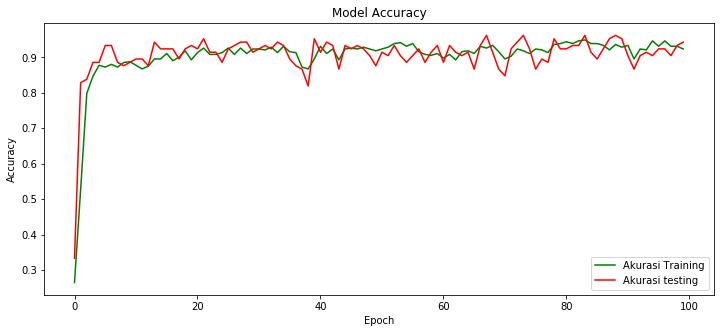

In [18]:
#Plotting Akurasi
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(hasil_train.history['accuracy'],'green', label='Akurasi Training')
ax0.plot(hasil_train.history['val_accuracy'],'red', label='Akurasi testing')

ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

# Plotting Loss

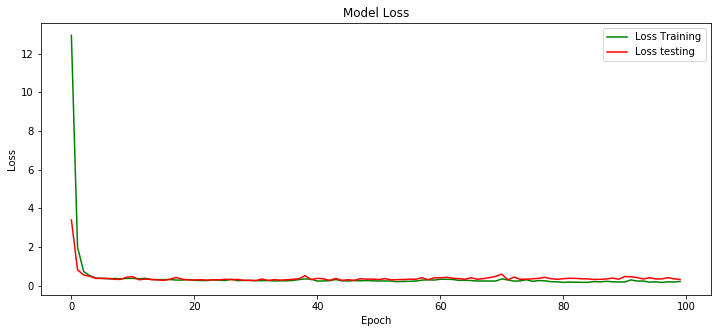

In [19]:
#Plotting Loss
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(hasil_train.history['loss'],'green', label='Loss Training')
ax0.plot(hasil_train.history['val_loss'],'red', label='Loss testing')

ax0.plot(label='Loss', loc='upper left')
ax0.set_title('Model Loss')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Loss")
ax0.legend()

**Confusion matrix** 
juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui. Berikut adalah beberapa manfaat dari confusion matrix:
Menunjukkan bagaimana model ketika membuat prediksi.
Tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat.
Setiap kolom dari confusion matrix merepresentasikan instance dari kelas prediksi.
Setiap baris dari confusion matrix mewakili instance dari kelas aktual.

**Classification Report** visualizer menampilkan skor presisi, daya ingat, F1, dan dukungan untuk model. Untuk mendukung interpretasi dan deteksi masalah yang lebih mudah, laporan ini mengintegrasikan skor numerik dengan peta panas kode warna. Semua peta panas berada dalam kisaran (0,0, 1,0) untuk memudahkan perbandingan model klasifikasi di berbagai laporan klasifikasi.

In [20]:
# import Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report

prediction = model.predict_classes(x_test)

In [21]:
prediction

y_test_number = np.argmax(y_test,axis=1) #ubah one hot encoding ke data asli

Membandingkan 20 data y_test dan 10 data prediksi

In [22]:
print (y_test_number[:20])
print (prediction[:10])

[3 3 2 3 0 1 2 2 3 3 3 3 0 3 3 0 3 3 3 0]
[3 3 2 3 2 1 2 2 3 3]


Membuat Confusion matrix dari y_test dan prediction

In [23]:
cm = confusion_matrix(y_test_number, prediction) 
print(cm)

[[32  0  2  0]
 [ 0 13  0  0]
 [ 3  0 15  1]
 [ 0  0  0 39]]


Menampilkan Classification Report dari y_test dan prediction

In [24]:
print(classification_report(y_test_number,prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       1.00      1.00      1.00        13
           2       0.88      0.79      0.83        19
           3       0.97      1.00      0.99        39

    accuracy                           0.94       105
   macro avg       0.94      0.93      0.94       105
weighted avg       0.94      0.94      0.94       105

